In [142]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard,ModelCheckpoint
import numpy as np


# <font color='blue'>Creating Training and Testing Datafiles</font>

In [143]:
def processData(dataset):
    
    # Why do we have to process? 
    #After you have selected the data, you need to consider how you are going to use the data. This preprocessing step is about getting the selected data into a form that we can work.
    labels  = dataset[:,3:4]
    data  = dataset[:,4:len(dataset[1])]
    
    return data, labels

## Model Definition

In [144]:

input_size = 10 #training data maximum value is 1000 needs 10 bits to represent in binary
drop_out = 0.2  
first_dense_layer_nodes  = 2048
sec_dense_layer_nodes = 1024
second_dense_layer_nodes = 2

def get_model(a):
    
    # Why do we need a model?
    #A model helps to explain a system and to study the effects of different components, and to make predictions about behavior.
    # Why use Dense layer and then activation?
    # Dense layer is just your regular densely-connected NN layer and the activation function need to be applied to an output of dense layer.
    # Why use sequential model with layers?
    #The Sequential model is just a linear stack of layers.


    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=a))
    model.add(Activation('relu'))
    
    # Why dropout?
    # To Prevent Neural Networks from Overfitting
    model.add(Dropout(drop_out))
    
    model.add(Dense(sec_dense_layer_nodes))
    model.add(Activation('relu'))
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    #To reduce the influence of extreme values in the data  without removing them from the data s#
    model.summary()
    
    # Why use categorical_crossentropy?
    #Loss function to calculate the amount of inaccuracy
    model.compile(optimizer='adadelta',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Model</font>

In [145]:
# Read Dataset
dataset = pd.read_csv('Gsc_concat.csv')
dataset=dataset.values
model = get_model(len(dataset[1])-4)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 2048)              2095104   
_________________________________________________________________
activation_31 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
activation_32 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 2050      
_________________________________________________________________
activation_33 (Activation)   (None, 2)                 0         
Total para

# <font color = blue>Run Model</font>

In [146]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 20

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
#filepath='max.csv'
#checkpoint=ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
#checkpoint=ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')


# Process Dataset
processedData, processedLabel = processData(dataset[0:int(0.9*len(dataset)),:])
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 7200 samples, validate on 1800 samples
Epoch 1/10000
7200/7200 [==============================] - 9s 1ms/step - loss: 0.7829 - acc: 0.5697 - val_loss: 0.6747 - val_acc: 0.5394
Epoch 2/10000
7200/7200 [==============================] - 9s 1ms/step - loss: 0.6296 - acc: 0.6512 - val_loss: 0.5479 - val_acc: 0.7394
Epoch 3/10000
7200/7200 [==============================] - 9s 1ms/step - loss: 0.5454 - acc: 0.7281 - val_loss: 0.5335 - val_acc: 0.7300
Epoch 4/10000
7200/7200 [==============================] - 9s 1ms/step - loss: 0.4915 - acc: 0.7624 - val_loss: 0.5319 - val_acc: 0.7350
Epoch 5/10000
7200/7200 [==============================] - 9s 1ms/step - loss: 0.4329 - acc: 0.7953 - val_loss: 0.5241 - val_acc: 0.7444
Epoch 6/10000
7200/7200 [==============================] - 8s 1ms/step - loss: 0.3806 - acc: 0.8225 - val_loss: 0.4808 - val_acc: 0.7661
Epoch 7/10000
7200/7200 [==============================] - 9s 1ms/step - loss: 0.3128 - acc: 0.8688 - val_loss: 0.5281 - val_acc: 

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000235064D75C0>,
      dtype=object)

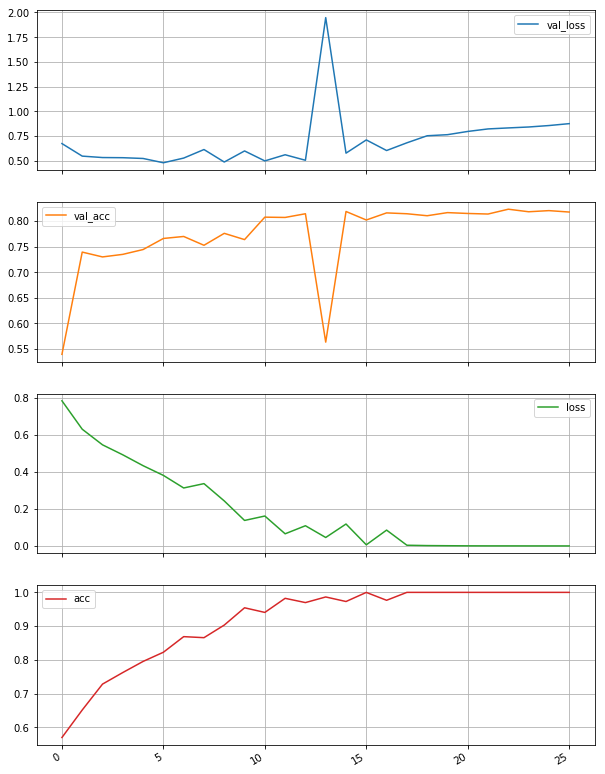

In [147]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [148]:
def Accuracy(VAL_TEST_OUT,ValDataAct):
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
#         print(sum(ValDataAct[i] - VAL_TEST_OUT[i]))
        if(int(np.around(VAL_TEST_OUT[i].astype(np.double), 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return str(accuracy)

In [149]:
wrong   = 0
right   = 0

testData = dataset[int(0.9*len(dataset)):len(dataset)]

processedTestData  = testData[:,4:len(dataset[1])]
processedTestLabel  = testData[:,3:4]
predictedTestLabel = []

# for i in range(1,len(testData)):
     #print(np.array(i))
# y = model.predict(processedTestData)
TL,TA = model.evaluate(processedTestData,processedTestLabel )
     #print(np.array(i).reshape(-1,10))
print(TA*100)    
# predictedTestLabel=np.amax(y, axis=1)
# A=Accuracy(predictedTestLabel,processedTestLabel)
# print(predictedTestLabel.shape)
# if processedTestLabel[i] == y.argmax():
#         right = right + 1
#     else:
#         wrong = wrong + 1


# print("Errors: " + str(wrong), " Correct :" + str(right))

# print("Testing Accuracy: " + A)

# # Please input your UBID and personNumber 
# testDataInput = testData['input'].tolist()
# testDataLabel = testData['label'].tolist()

# testDataInput.insert(0, "UBID")
# testDataLabel.insert(0, "saivarun")

# testDataInput.insert(1, "personNumber")
# testDataLabel.insert(1, "XXXXXXXX")

# predictedTestLabel.insert(0, "")
# predictedTestLabel.insert(1, "")

# output = {}
# output["input"] = testDataInput
# output["label"] = testDataLabel

# output["predicted_label"] = predictedTestLabel

# opdf = pd.DataFrame(output)
# opdf.to_csv('output.csv')

1000/1000 [==============================] - 0s 391us/step
82.8
